In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [8]:
d=100
# load data:
lambs = [0.0, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
seeds = [1, 11, 111]
all_data = {}
for lamb in lambs:
    all_data[lamb] = []
for seed in seeds:
    filename = 'logs/seed' + str(seed) + 'data.npy'
    file = open(filename, 'rb')
    object_file = pickle.load(file)
    for lamb in lambs:
        all_data[lamb].append(object_file[lamb])


In [9]:
mean_data = {}
std_data = {}
for lamb in lambs:
    data = np.array(all_data[lamb])
    mean_data[lamb] = np.mean(data, axis=0)
    std_data[lamb] = np.std(data, axis=0)

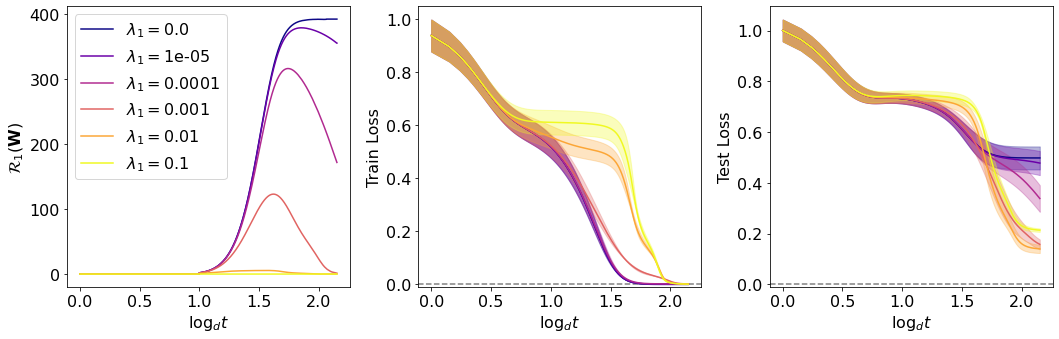

In [10]:
plt.rcParams['font.size'] = '16'
colors = plt.get_cmap('plasma')(np.linspace(0, 1, 6))

fig,axs = plt.subplots(1, 3,figsize=(15, 5))
fig.set_facecolor("white")

axs = np.ravel(axs)

plt.sca(axs[2])
plt.axhline(0., linestyle="dashed", color='gray')
for i in range(len(lambs)):
    lamb = lambs[i]
    test_losses = mean_data[lamb][1, :]
    stddevs = std_data[lamb][1, :]
    x_vals = [np.log(t+1)/np.log(d) for t in range(len(test_losses))]
    plt.plot(x_vals, test_losses, color = colors[i], label=r'$\lambda_3 =$' + str(lamb))
    plt.fill_between(x_vals, test_losses - stddevs, test_losses+stddevs, color=colors[i], alpha=0.3)
plt.ylabel("Test Loss")
plt.xlabel(r'$\log_d t$')
plt.ylim(ymin=-0.01)

# plt.legend()


plt.sca(axs[1])
plt.axhline(0., linestyle="dashed", color='gray')
for i in range(len(lambs)):
    lamb = lambs[i]
    train_losses = mean_data[lamb][0, :]
    stddevs = std_data[lamb][0, :]
    x_vals = [np.log(t+1)/np.log(d) for t in range(len(train_losses))]
    plt.plot(x_vals, train_losses, color = colors[i], label=r'$\lambda_3 =$' + str(lamb))
    plt.fill_between(x_vals, train_losses - stddevs, train_losses+stddevs, color=colors[i], alpha=0.3)
plt.ylabel("Train Loss")
plt.xlabel(r'$\log_d t$')
plt.ylim(ymin=-0.01)

# plt.legend()

plt.sca(axs[0])
for i in range(len(lambs)):
    lamb = lambs[i]
    reg = mean_data[lamb][2, :]
    cumsum_vec = np.cumsum(np.insert(reg, 0, 0))
    window_width = 100
    ma_vec = np.concatenate([np.zeros(window_width-1), (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width])

    stddevs = std_data[lamb][2, :]
    x_vals = [np.log(t+1)/np.log(d) for t in range(len(reg))]
    plt.plot(x_vals, ma_vec, color = colors[i], label=r'$\lambda_1 =$' + str(lamb))
    # plt.fill_between(x_vals, reg- stddevs, reg+stddevs, color=colors[i], alpha=0.3)
plt.ylabel(r'$\mathcal{R}_1(\mathbf{W})$')
plt.xlabel(r'$\log_d t$')
plt.legend()

plt.tight_layout()
# plt.savefig("d100_k2_with_r1.pdf", bbox_inches = 'tight')

plt.show()
